### Some code to modify the original file to make it suitable for dataframe

In [71]:
import csv
import pandas as pd

with open('test4.txt', 'r') as f:
    stripped = (line.strip() for line in f)
    lines = (line.split('    ',1) for line in stripped if line)
    with open('output_file3.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('Hotel name', 'Reviews'))
        writer.writerows(lines)



import pandas as pd
df = pd.read_csv('output_file3.csv')

# Remove all whitespaces from the 'Reviews' column
df['Reviews'] = df['Reviews'].str.replace(r'\s+', ' ', regex=True)

# Save the DataFrame back to the CSV file
df.to_csv('output_file3.csv', index=False)

# Add one more column to the DataFrame
df.insert(df.columns.get_loc('Reviews') + 1, 'Sentiment', 'Positive')

# Save the DataFrame back to the CSV file
df.to_csv('output_file3.csv', index=False)

df=pd.read_csv('output_file3.csv')
# Remove the first column
df = df.iloc[:, 1:]


output_file = 'output_file3.csv'

df.to_csv(output_file, index=False)
print(df)


In [72]:
import pandas as pd


input_file = 'output_file3.csv'

# Read the content of the original CSV file into a DataFrame
df_original = pd.read_csv(input_file)

# Make a copy of the DataFrame to modify
df_modified = df_original.copy()


output_file_modified = 'output_file_copy.csv'

# Save the modified DataFrame to a new CSV file
df_modified.to_csv(output_file_modified, index=False)


### visualize some property of the datasets

In [20]:

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers.core import Dropout, Activation,Dense
from keras.layers import Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Embedding
from sklearn.model_selection import train_test_split




In [21]:
# read the original CSV file into a DataFrame
#! pip install openpyxl
hotel_review=pd.read_excel('corpus2.xlsx')

hotel_review.shape


(10805, 2)

In [22]:
# show the first 5 rows of the DataFrame
hotel_review.head()

,Reviews,Sentiment
0,I stayed in the hotel for one night. While the...,Negative
1,Beautiful property. Neatness and excelence all...,Positive
2,This place was wonderful from start to finish....,Positive
3,"A beautiful, recently renovated luxury hotel i...",Positive
4,I stayed 3 nights and enjoyed everything the h...,Positive


In [23]:
# check whether there are any missing values in the DataFrame
hotel_review.isnull().any()

Reviews      False
Sentiment    False
dtype: bool

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

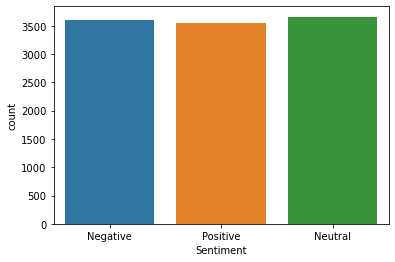

In [24]:
sns.countplot(x='Sentiment', data=hotel_review)

In [25]:
# Observing some puctuations and special characters in the reviews
hotel_review['Reviews'][0]

'I stayed in the hotel for one night. While there was a mix-up with my reservation, the team helped me secure a room for teh night. But the new room was cheaper, but because of some archaic systems they are using, they couldn\'t refund me the money back or give me hotel credit, so I needed to try to spend all the money in the hotel, which I couldn\'t ultimately, so I ended up having to leave money unspent, which I couldn\'t even use on any future stay. So disappointing. But regardless the team at check in at the front desk were extremely helpful, and even opened up one of the rooms for me to freshen up in. But the room I ended up using was so small it was ridiculous, the toile was separate from the rest of the washroom, and was in a room teh size of a small closet. The shower was the most narrow shower I have ever been in, almost like it was a tiny corridor that was repurposed. The bed was the most uncomfortable thing I have ever slept in. Then there is the "gym", which is just a small

In [26]:
# Observe the label
hotel_review['Sentiment'][0]

'Negative'

In [129]:
# get the size of the vocabulary
vocabulary=[]
for i in hotel_review['Reviews']:
    for j in i.split():
        if j not in vocabulary:
            vocabulary.append(j)

len(set(vocabulary))

66089

### Preprocessing datasets

In [27]:
reviews=hotel_review['Reviews']
sentiments=hotel_review['Sentiment']
reviews


0        I stayed in the hotel for one night. While the...
1        Beautiful property. Neatness and excelence all...
2        This place was wonderful from start to finish....
3        A beautiful, recently renovated luxury hotel i...
4        I stayed 3 nights and enjoyed everything the h...
                               ...                        
10800    This is a 3 star hotel. The rooms however are ...
10801    Family of 4 (2 adults, 2 children) stayed at t...
10802    I visited with my disabled daughter and grandd...
10803    Lovely hotel, very Canadian. Great staff. Only...
10804    My partner and I spent 3 nights here to celebr...
Name: Reviews, Length: 10805, dtype: object

In [28]:
# lowecasing all the reviews and sentiments
def lower_case(input_str):
    input_str=input_str.lower()
    return input_str

reviews=reviews.apply(lambda x: lower_case(x))
reviews

sentiments=sentiments.apply(lambda x: lower_case(x))
sentiments





0        negative
1        positive
2        positive
3        positive
4        positive
           ...   
10800     neutral
10801     neutral
10802     neutral
10803     neutral
10804     neutral
Name: Sentiment, Length: 10805, dtype: object

In [29]:
# define a function to remove all punctuations and special characters in the reviews
def remove_punctuations(text):
    for punctuation in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~':  # declare all special characters
        text = text.replace(punctuation, '') # replace the special characters with a space
    return text.strip() # return the stripped text


reviews=reviews.apply(remove_punctuations)
reviews


0        i stayed in the hotel for one night while ther...
1        beautiful property neatness and excelence all ...
2        this place was wonderful from start to finish ...
3        a beautiful recently renovated luxury hotel in...
4        i stayed 3 nights and enjoyed everything the h...
                               ...                        
10800    this is a 3 star hotel the rooms however are c...
10801    family of 4 2 adults 2 children stayed at the ...
10802    i visited with my disabled daughter and grandd...
10803    lovely hotel very canadian great staff only is...
10804    my partner and i spent 3 nights here to celebr...
Name: Reviews, Length: 10805, dtype: object

In [ ]:
# define a function to remove all punctuations and special characters
# import re
# def remove_patterns(text):
#     pattern = re.compile(r'\d+')
#     text = re.sub(pattern, '', text)
#     return text.strip()

# text='This is a sample    text!'
# text=remove_patterns(text)
# text

In [30]:
# tokenization using nltk library
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

reviews=reviews.apply(tokenize)
reviews

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\60174\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [i, stayed, in, the, hotel, for, one, night, w...
1        [beautiful, property, neatness, and, excelence...
2        [this, place, was, wonderful, from, start, to,...
3        [a, beautiful, recently, renovated, luxury, ho...
4        [i, stayed, 3, nights, and, enjoyed, everythin...
                               ...                        
10800    [this, is, a, 3, star, hotel, the, rooms, howe...
10801    [family, of, 4, 2, adults, 2, children, stayed...
10802    [i, visited, with, my, disabled, daughter, and...
10803    [lovely, hotel, very, canadian, great, staff, ...
10804    [my, partner, and, i, spent, 3, nights, here, ...
Name: Reviews, Length: 10805, dtype: object

In [31]:
# removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# extract the stopwords from the NLTK package, which contains words that dont add much meaning to the text
stopwords=['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
               'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
               'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
                   'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
                   'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
                   'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
                   'in', 'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 
                   'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
                     'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very']

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

print(stop_words)
text="I don't love this hotel!!!"
text2="I shouldn't love this hotel!!!"
remove_stopwords(text)
remove_stopwords(text2)

reviews=reviews.apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\60174\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [117]:
reviews

0        [i, stayed, hotel, one, night, mixup, reservat...
1        [beautiful, property, neatness, excelence, aro...
2        [place, wonderful, start, finish, helpful, con...
3        [beautiful, recently, renovated, luxury, hotel...
4        [i, stayed, 3, nights, enjoyed, everything, ho...
                               ...                        
10800    [3, star, hotel, rooms, however, clean, large,...
10801    [family, 4, 2, adults, 2, children, stayed, se...
10802    [i, visited, disabled, daughter, granddaughter...
10803    [lovely, hotel, canadian, great, staff, issue,...
10804    [partner, i, spent, 3, nights, celebrate, new,...
Name: Reviews, Length: 10805, dtype: object

In [32]:
# define a function to lemmaize the words
from nltk.stem import WordNetLemmatizer

my_dictionary={
    'going':'go',
    'went':'go',
    'gone':'go',
    'goes':'go',
}

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'tokenized_reviews' column
reviews = reviews.apply(lemmatize_tokens)

# Display the DataFrame
reviews


0        [i, stayed, hotel, one, night, mixup, reservat...
1        [beautiful, property, neatness, excelence, aro...
2        [place, wonderful, start, finish, helpful, con...
3        [beautiful, recently, renovated, luxury, hotel...
4        [i, stayed, 3, night, enjoyed, everything, hot...
                               ...                        
10800    [3, star, hotel, room, however, clean, large, ...
10801    [family, 4, 2, adult, 2, child, stayed, sequoi...
10802    [i, visited, disabled, daughter, granddaughter...
10803    [lovely, hotel, canadian, great, staff, issue,...
10804    [partner, i, spent, 3, night, celebrate, new, ...
Name: Reviews, Length: 10805, dtype: object

In [119]:
reviews

0        [i, stayed, hotel, one, night, mixup, reservat...
1        [beautiful, property, neatness, excelence, aro...
2        [place, wonderful, start, finish, helpful, con...
3        [beautiful, recently, renovated, luxury, hotel...
4        [i, stayed, 3, night, enjoyed, everything, hot...
                               ...                        
10800    [3, star, hotel, room, however, clean, large, ...
10801    [family, 4, 2, adult, 2, child, stayed, sequoi...
10802    [i, visited, disabled, daughter, granddaughter...
10803    [lovely, hotel, canadian, great, staff, issue,...
10804    [partner, i, spent, 3, night, celebrate, new, ...
Name: Reviews, Length: 10805, dtype: object

In [699]:
# store the processed reviews in a new list
processed_reviews = []
for review in reviews:
    processed_reviews.append(review)

processed_reviews


[['i',
  'stayed',
  'hotel',
  'one',
  'night',
  'mixup',
  'reservation',
  'team',
  'helped',
  'secure',
  'room',
  'teh',
  'night',
  'but',
  'new',
  'room',
  'cheaper',
  'but',
  'archaic',
  'system',
  'using',
  'could',
  "n't",
  'refund',
  'money',
  'back',
  'give',
  'hotel',
  'credit',
  'i',
  'needed',
  'try',
  'spend',
  'money',
  'hotel',
  'i',
  'could',
  "n't",
  'ultimately',
  'i',
  'ended',
  'leave',
  'money',
  'unspent',
  'i',
  'could',
  "n't",
  'even',
  'use',
  'future',
  'stay',
  'disappointing',
  'but',
  'regardless',
  'team',
  'check',
  'front',
  'desk',
  'extremely',
  'helpful',
  'even',
  'opened',
  'one',
  'room',
  'freshen',
  'but',
  'room',
  'i',
  'ended',
  'using',
  'small',
  'ridiculous',
  'toile',
  'separate',
  'rest',
  'washroom',
  'room',
  'teh',
  'size',
  'small',
  'closet',
  'shower',
  'narrow',
  'shower',
  'i',
  'ever',
  'almost',
  'like',
  'tiny',
  'corridor',
  'repurposed',
  

In [137]:
sentiments

0        negative
1        positive
2        positive
3        positive
4        positive
           ...   
10800     neutral
10801     neutral
10802     neutral
10803     neutral
10804     neutral
Name: Sentiment, Length: 10805, dtype: object

In [138]:
# convert sentiments to numpy array
sentiments=np.array(sentiments)
sentiments

array(['negative', 'positive', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [139]:
sentiment_map={'positive':1,'negative':-1,'neutral':0}
sentiment_values_integers = np.vectorize(lambda x: sentiment_map[x])(sentiments)
# y = np.array(sentiments.map(lambda x: 1 if x == "positive" else (0 if x == "neutral" else -1)))
# y
sentiment_values_integers

array([-1,  1,  1, ...,  0,  0,  0])

In [140]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Fit the encoder and transform the sentiment_values_integers array
sentiment_one_hot = encoder.fit_transform(sentiment_values_integers.reshape(-1, 1))
sentiment_one_hot

# [1,0,0]-negative

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [325]:
# y = np.array(hotel_review['Sentiment'].map(lambda x: 1 if x == "positive" else (0 if x == "neutral" else -1)))
# y

array([-1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,
        0,  1,  1,  1,  0,  1, -1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,
        1,  1, -1,  1, -1,  1,  0,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,
        1, -1, -1,  1, -1

In [141]:
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiment_one_hot, test_size=0.1, random_state=42, shuffle=True)
#X_train
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [142]:
X_train[0]

['i',
 'stayed',
 'hotel',
 'one',
 'night',
 'mixup',
 'reservation',
 'team',
 'helped',
 'secure',
 'room',
 'teh',
 'night',
 'but',
 'new',
 'room',
 'cheaper',
 'but',
 'archaic',
 'system',
 'using',
 'could',
 "n't",
 'refund',
 'money',
 'back',
 'give',
 'hotel',
 'credit',
 'i',
 'needed',
 'try',
 'spend',
 'money',
 'hotel',
 'i',
 'could',
 "n't",
 'ultimately',
 'i',
 'ended',
 'leave',
 'money',
 'unspent',
 'i',
 'could',
 "n't",
 'even',
 'use',
 'future',
 'stay',
 'disappointing',
 'but',
 'regardless',
 'team',
 'check',
 'front',
 'desk',
 'extremely',
 'helpful',
 'even',
 'opened',
 'one',
 'room',
 'freshen',
 'but',
 'room',
 'i',
 'ended',
 'using',
 'small',
 'ridiculous',
 'toile',
 'separate',
 'rest',
 'washroom',
 'room',
 'teh',
 'size',
 'small',
 'closet',
 'shower',
 'narrow',
 'shower',
 'i',
 'ever',
 'almost',
 'like',
 'tiny',
 'corridor',
 'repurposed',
 'bed',
 'uncomfortable',
 'thing',
 'i',
 'ever',
 'slept',
 'gym',
 'just',
 'small',
 'roo

In [143]:
y_train.shape

(9724, 3)

In [144]:
word_tokenizer = Tokenizer() # create an object of class Tokenizer
word_tokenizer.fit_on_texts(X_train) # fit the tokenizer on the text

X_train_tokens = word_tokenizer.texts_to_sequences(X_train) # convert each word to a token
X_test_tokens = word_tokenizer.texts_to_sequences(X_test) # convert each word to a token
X_train_tokens

[[1,
  19,
  14,
  146,
  461,
  146,
  3,
  1075,
  155,
  1214,
  1911,
  210,
  13,
  434,
  43,
  1345,
  195,
  4317,
  17,
  1,
  371,
  10,
  3,
  104,
  54,
  585,
  6,
  395],
 [850,
  24,
  299,
  322,
  3,
  714,
  21,
  498,
  93,
  1087,
  29,
  122,
  35,
  6,
  61,
  995,
  718,
  94,
  39,
  415,
  2692,
  210,
  109,
  270,
  89,
  34,
  1389,
  12548,
  779,
  1654,
  270,
  492,
  2,
  193,
  725,
  46,
  5,
  75,
  299,
  2039,
  1178,
  50,
  1390,
  50,
  2,
  448,
  611,
  466,
  449,
  12,
  256,
  3,
  148,
  50,
  41,
  166,
  71,
  14,
  8,
  10,
  40],
 [23,
  24,
  6,
  54,
  566,
  381,
  16,
  34,
  21,
  9537,
  4,
  2897,
  3,
  2127,
  20,
  2,
  356,
  259,
  224,
  2,
  163,
  5,
  185,
  162,
  50,
  245,
  18,
  126,
  13,
  10],
 [265,
  14,
  32,
  3,
  416,
  159,
  536,
  314,
  2,
  611,
  65,
  5,
  1430,
  217,
  12549,
  325,
  1039,
  172,
  426,
  9,
  108,
  582,
  199,
  8,
  19,
  12550,
  325,
  1047,
  83,
  312,
  2,
  539,
  206,
 

In [145]:
vocab_length = len(word_tokenizer.word_index) + 1 # add 1 for the 0 padding
vocab_length

26584

In [146]:
# adjust the max_len to store more context of the reviews, it may increase the accuracy of the model
max_len=100
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_len, padding='post') # pad the sequences
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_len, padding='post') # pad the sequences
X_train_pad

array([[   1,   19,   14, ...,    0,    0,    0],
       [ 850,   24,  299, ...,    0,    0,    0],
       [  23,   24,    6, ...,    0,    0,    0],
       ...,
       [ 103,  228,    1, ...,    0,    0,    0],
       [ 215,   20,  632, ...,    0,    0,    0],
       [  72,  444,   21, ...,   41, 4190,  822]])

### Apply word embedding using gloVe, map the words in reviews with unique number with words in glove txt file

In [147]:
# create a dictionary to store the weights for each word
embedding_dict={}
with open('glove.6B.100d.txt',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32') # convert the strings to numpy array
        embedding_dict[word]=vectors # store the vectors in a dictionary

f.close()

In [148]:
# create an embedding matrix where each row number will correspond to the index of the word in the corpus
embedding_matrix=np.zeros((vocab_length,100))
for word,i in word_tokenizer.word_index.items():
    embedding_vector=embedding_dict.get(word) # get the vectors for the word
    if embedding_vector is not None: # words not found in the embedding index will be all zeros
        embedding_matrix[i]=embedding_vector # save the vector at each row number as per word index

In [149]:
embedding_matrix.shape

(26584, 100)

In [150]:
y_train


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

### RNN model

In [331]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam, SGD
model=Sequential()
embedding=Embedding(vocab_length,100,weights=[embedding_matrix],input_length=max_len,trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.5))
model.add(SimpleRNN(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',bias_regularizer=l2(0.02)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',bias_regularizer=l2(0.02)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu',bias_regularizer=l2(0.02)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * 0.99  # Reduce the learning rate by 10% after each subsequent epoch

# Create a LearningRateScheduler callback
scheduler = LearningRateScheduler(lr_scheduler)
initial_lr = 0.005
optimizer = SGD(lr=initial_lr, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 100, 100)          2658400   
                                                                 
 spatial_dropout1d_15 (Spati  (None, 100, 100)         0         
 alDropout1D)                                                    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 100, 128)          29312     
                                                                 
 dropout_59 (Dropout)        (None, 100, 128)          0         
                                                                 
 dense_60 (Dense)            (None, 100, 64)           8256      
                                                                 
 dropout_60 (Dropout)        (None, 100, 64)           0         
                                                     

In [329]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_test_pad.shape)
print(y_test.shape)
# check input layer shape
print(model.layers[0].input_shape)

(9724, 100)
(9724, 3)
(1081, 100)
(1081, 3)
(None, 100)


In [332]:
model_history=model.fit(X_train_pad,y_train,epochs=15,verbose=1,batch_size=32,validation_split=0.1,callbacks=[scheduler])


Epoch 1/15
274/274 [==============================] - 19s 64ms/step - loss: 1.0892 - accuracy: 0.4045 - val_loss: 1.0671 - val_accuracy: 0.4388 - lr: 0.0050
Epoch 2/15
274/274 [==============================] - 17s 61ms/step - loss: 1.0201 - accuracy: 0.4726 - val_loss: 0.9268 - val_accuracy: 0.5324 - lr: 0.0050
Epoch 3/15
274/274 [==============================] - 17s 61ms/step - loss: 0.9427 - accuracy: 0.5358 - val_loss: 0.8389 - val_accuracy: 0.6064 - lr: 0.0050
Epoch 4/15
274/274 [==============================] - 17s 61ms/step - loss: 0.9127 - accuracy: 0.5562 - val_loss: 0.8575 - val_accuracy: 0.6023 - lr: 0.0050
Epoch 5/15
274/274 [==============================] - 17s 63ms/step - loss: 0.8994 - accuracy: 0.5683 - val_loss: 0.8141 - val_accuracy: 0.6310 - lr: 0.0050
Epoch 6/15
274/274 [==============================] - 17s 62ms/step - loss: 0.8799 - accuracy: 0.5807 - val_loss: 0.8169 - val_accuracy: 0.6208 - lr: 0.0049
Epoch 7/15
274/274 [==============================] - 17s 

In [333]:
score=model.evaluate(X_test_pad,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

34/34 [==============================] - 1s 22ms/step - loss: 0.7398 - accuracy: 0.6614
Test Score: 0.7397991418838501
Test Accuracy: 0.6614245772361755


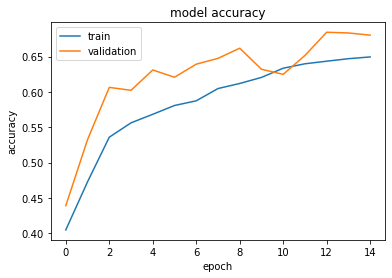

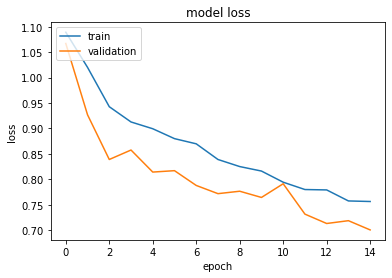

In [334]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

### save the model

In [335]:
model3=model.to_json()
with open("model3.json","w") as json_file:
    json_file.write(model3)
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [336]:
# load json and create model
from keras.models import model_from_json
json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model3.h5")

In [197]:
# loaded_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# print("Loaded model from disk")
# score = loaded_model.evaluate(X_test_pad, y_test, verbose=1)
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

Loaded model from disk
34/34 [==============================] - 1s 13ms/step - loss: 0.7531 - accuracy: 0.6503
Test Score: 0.7530869841575623
Test Accuracy: 0.650323748588562


In [337]:
sentence = "This hotel was really bad. I will never recommend this hotel to anyone."


# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)
print(sentence)


tokenizer = Tokenizer()  
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post') 


# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")

['hotel', 'really', 'bad', 'i', 'will', 'never', 'recommend', 'hotel', 'anyone']
1/1 [==============================] - 0s 200ms/step
Prediction for sentence 1: [[0.4973916  0.24796878 0.25463963]]


In [338]:
sentence="not bad hotel"

# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)


tokenizer = Tokenizer() 
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post')  

# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")


1/1 [==============================] - 0s 50ms/step
Prediction for sentence 1: [[0.41578397 0.2602195  0.32399654]]


### CNN model

In [346]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D,Embedding
from keras.layers.core import Dropout, Activation,Dense
from keras.layers import Flatten
from keras.regularizers import l2,l1
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
model_cnn=Sequential()
embedding=Embedding(vocab_length,100,weights=[embedding_matrix],input_length=max_len,trainable=False)
model_cnn.add(embedding)

model_cnn.add(Conv1D(128,5,activation='relu',kernel_regularizer=l2(0.02)))
#model_cnn.add(BatchNormalization())
#model_cnn.add(MaxPooling1D(5))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(64,5,activation='relu',kernel_regularizer=l2(0.02)))
#model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))
#model_cnn.add(Conv1D(64,5,activation='relu',kernel_regularizer=l2(0.01)))
#model_cnn.add(Dropout(0.5))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(3,activation='softmax'))
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr   # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * 0.99  # Reduce the learning rate by 10% after each subsequent epoch

# Create a LearningRateScheduler callback
scheduler = LearningRateScheduler(lr_scheduler)
initial_lr = 0.001
optimizer = SGD(learning_rate=initial_lr, momentum=0.9)
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_cnn.summary())

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 100, 100)          2658400   
                                                                 
 conv1d_29 (Conv1D)          (None, 96, 128)           64128     
                                                                 
 dropout_69 (Dropout)        (None, 96, 128)           0         
                                                                 
 conv1d_30 (Conv1D)          (None, 92, 64)            41024     
                                                                 
 dropout_70 (Dropout)        (None, 92, 64)            0         
                                                                 
 global_max_pooling1d_12 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                     

In [347]:
model_history_cnn=model_cnn.fit(X_train_pad,y_train,epochs=15,verbose=1,batch_size=32,validation_split=0.1,callbacks=[scheduler])

Epoch 1/15


274/274 [==============================] - 8s 28ms/step - loss: 4.5771 - accuracy: 0.4953 - val_loss: 4.0851 - val_accuracy: 0.5930 - lr: 0.0010
Epoch 2/15
274/274 [==============================] - 7s 27ms/step - loss: 3.7071 - accuracy: 0.6148 - val_loss: 3.3857 - val_accuracy: 0.6557 - lr: 0.0010
Epoch 3/15
274/274 [==============================] - 7s 26ms/step - loss: 3.1109 - accuracy: 0.6357 - val_loss: 2.8732 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 4/15
274/274 [==============================] - 7s 25ms/step - loss: 2.6367 - accuracy: 0.6632 - val_loss: 2.4447 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 5/15
274/274 [==============================] - 7s 26ms/step - loss: 2.2693 - accuracy: 0.6701 - val_loss: 2.1209 - val_accuracy: 0.6629 - lr: 0.0010
Epoch 6/15
274/274 [==============================] - 7s 26ms/step - loss: 1.9674 - accuracy: 0.6762 - val_loss: 1.8769 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 7/15
274/274 [==============================] - 7s 26ms/step - loss: 

In [348]:
score_cnn=model_cnn.evaluate(X_test_pad,y_test,verbose=1)
print("Test Score:",score_cnn[0])
print("Test Accuracy:",score_cnn[1])

34/34 [==============================] - 0s 7ms/step - loss: 0.9726 - accuracy: 0.6698
Test Score: 0.9725827574729919
Test Accuracy: 0.6697502136230469


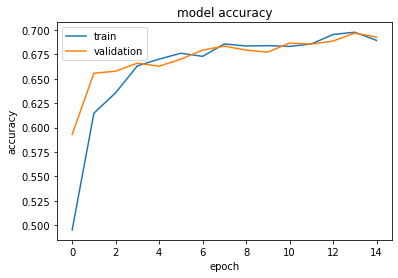

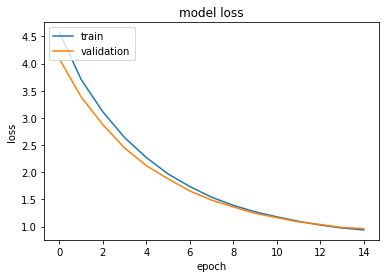

In [349]:
import matplotlib.pyplot as plt
plt.plot(model_history_cnn.history['accuracy'])
plt.plot(model_history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(model_history_cnn.history['loss'])
plt.plot(model_history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [350]:
model2_json=model_cnn.to_json()
with open("model2.json","w") as json2_file:
    json2_file.write(model2_json)
model_cnn.save_weights("model2.h5")
print("Saved model to disk")


Saved model to disk


In [351]:
from keras.models import model_from_json
json_file=open('model2.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model2.h5")

In [228]:
# loaded_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
# score_loaded_model=loaded_model.evaluate(X_test_pad,y_test,verbose=1)
# print("Test Score:",score_loaded_model[0])
# print("Test Accuracy:",score_loaded_model[1])

34/34 [==============================] - 1s 9ms/step - loss: 0.9184 - accuracy: 0.6596
Test Score: 0.9184127449989319
Test Accuracy: 0.6595744490623474


In [352]:
sentence = "Disappointed with the service,really bad experience"
# negative review, but the model predicts it as positive, which could be due to small datasets with 3 classes

# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)


tokenizer = Tokenizer()  
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post')  

# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")

1/1 [==============================] - 0s 69ms/step
Prediction for sentence 1: [[0.56402874 0.2894389  0.1465324 ]]


In [353]:
sentence = "decent hotel, but the service could be better, overall a good experience"
# the model fail to predict the sentiment of this review
# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)


tokenizer = Tokenizer() 
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post') 

# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")


1/1 [==============================] - 0s 21ms/step
Prediction for sentence 1: [[0.7530672  0.22207963 0.02485319]]


### LSTM model


In [378]:

# lstm_model=Sequential()
# embedding=Embedding(vocab_length,100,weights=[embedding_matrix],input_length=max_len,trainable=False)
# lstm_model.add(embedding)
# lstm_model.add(SpatialDropout1D(0.2))
# lstm_model.add(LSTM(64))
# #lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(3,activation='relu',kernel_regularizer=l2(0.01)))
# lstm_model.add(Dropout(0.5))
# #lstm_model.add(Flatten())

# lstm_model.add(Dense(3,activation='softmax'))
from keras.layers import LSTM, SpatialDropout1D
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(64, activation='relu'))
#lstm_model.add(Dropout(0.5))
#lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(32, activation='relu'))
#lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(3, activation='softmax'))
optimizer=Adam(learning_rate=0.001)

In [379]:
lstm_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
print(lstm_model.summary())


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 100, 100)          2658400   
                                                                 
 spatial_dropout1d_22 (Spati  (None, 100, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_12 (LSTM)              (None, 128)               117248    
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_88 (Dense)            (None, 3)                 99        
                                                     

In [380]:
lstm_model_history=lstm_model.fit(X_train_pad,y_train,epochs=15,verbose=1,batch_size=32,validation_split=0.1)

Epoch 1/15
274/274 [==============================] - 58s 201ms/step - loss: 1.0860 - accuracy: 0.3940 - val_loss: 1.0840 - val_accuracy: 0.3546
Epoch 2/15
274/274 [==============================] - 57s 208ms/step - loss: 1.0730 - accuracy: 0.4030 - val_loss: 1.0656 - val_accuracy: 0.4183
Epoch 3/15
274/274 [==============================] - 56s 204ms/step - loss: 1.0671 - accuracy: 0.4196 - val_loss: 1.0924 - val_accuracy: 0.3535
Epoch 4/15
274/274 [==============================] - 54s 199ms/step - loss: 1.0585 - accuracy: 0.4354 - val_loss: 1.1054 - val_accuracy: 0.3207
Epoch 5/15
274/274 [==============================] - 54s 198ms/step - loss: 1.0244 - accuracy: 0.4547 - val_loss: 0.8947 - val_accuracy: 0.5776
Epoch 6/15
274/274 [==============================] - 56s 206ms/step - loss: 0.8260 - accuracy: 0.6146 - val_loss: 0.7429 - val_accuracy: 0.6711
Epoch 7/15
274/274 [==============================] - 58s 211ms/step - loss: 0.7506 - accuracy: 0.6502 - val_loss: 0.7163 - val_ac

In [381]:
# test the model
score=lstm_model.evaluate(X_test_pad,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])


34/34 [==============================] - 3s 83ms/step - loss: 0.6687 - accuracy: 0.6920
Test Score: 0.6686739921569824
Test Accuracy: 0.6919518709182739


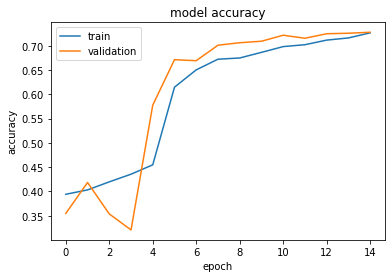

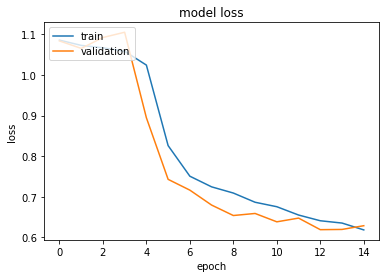

In [382]:
# plot the training and validation accuracy
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [256]:
X_test

9855    [family, four, stay, july, 2023, negative, 1, ...
7254    [stayed, four, night, end, march, arrived, che...
6847    [extremely, hot, visited, led, problem, firstl...
9995    [can, say, 1983, wow, dated, absolutely, no, p...
5833    [really, great, stay, paris, deli, loved, gym,...
                              ...                        
8994    [love, raphaelmy, 3rd, stay, definitely, not, ...
7466    [just, returned, staying, 4, night, newport, b...
8255    [overall, good, experience, decent, breakfast,...
3880    [fabulous, location, room, nice, but, fight, e...
5581    [sally, receptionist, helpful, food, good, roo...
Name: Reviews, Length: 1081, dtype: object

In [282]:
y_test[1078]

array([0., 0., 1.])

In [392]:
prediction=lstm_model.predict(X_test_pad)
prediction

34/34 [==============================] - 2s 56ms/step


array([[0.67346954, 0.28560808, 0.04092233],
       [0.17910388, 0.6387522 , 0.1821439 ],
       [0.8760391 , 0.11688779, 0.00707309],
       ...,
       [0.00363618, 0.18495445, 0.81140935],
       [0.01906241, 0.5041672 , 0.47677037],
       [0.00140381, 0.09330318, 0.905293  ]], dtype=float32)

In [393]:
y_test
# the model seems have difficulty in predicting neutral reviews, this may due to small datasets with 3 classes

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [394]:
model_json=lstm_model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
lstm_model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [395]:
from keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [261]:
# loaded_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# score=loaded_model.evaluate(X_test_pad,y_test,verbose=1)
# print("Test Score:",score[0])
# print("Test Accuracy:",score[1])

34/34 [==============================] - 3s 77ms/step - loss: 0.6457 - accuracy: 0.7123
Test Score: 0.6457191109657288
Test Accuracy: 0.7123034000396729


In [399]:
sentence = "This hotel is really bad, I will never recommend this hotel to anyone"
# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)


tokenizer = Tokenizer()  
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post')  # Adjust the sequence length

# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")


1/1 [==============================] - 0s 77ms/step
Prediction for sentence 1: [[0.67708635 0.28509173 0.03782181]]


In [397]:

# edge case,'not' is a negation word, which can change the meaning of the sentence,it was able to predict the sentiment correctly
sentence = "This hotel is not good at all, but the food is good"
# lowercasing  all the the reviews
sentence=sentence.lower()
sentence=remove_punctuations(sentence)
sentence=tokenize(sentence)
# removing stopwords
sentence=remove_stopwords(sentence)

# lematization
sentence=lemmatize_tokens(sentence)


tokenizer = Tokenizer() 
tokenizer.fit_on_texts([sentence])
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post')  

# Make predictions
predictions = loaded_model.predict(padded_sequences)


print(f"Prediction for sentence 1: {predictions}")


1/1 [==============================] - 0s 50ms/step
Prediction for sentence 1: [[0.3642065  0.46417266 0.17162085]]


### BERT model 

In [401]:
hotel=pd.read_excel('corpus2.xlsx')
review=hotel['Reviews']
sentiment=hotel['Sentiment']
review

0        I stayed in the hotel for one night. While the...
1        Beautiful property. Neatness and excelence all...
2        This place was wonderful from start to finish....
3        A beautiful, recently renovated luxury hotel i...
4        I stayed 3 nights and enjoyed everything the h...
                               ...                        
10800    This is a 3 star hotel. The rooms however are ...
10801    Family of 4 (2 adults, 2 children) stayed at t...
10802    I visited with my disabled daughter and grandd...
10803    Lovely hotel, very Canadian. Great staff. Only...
10804    My partner and I spent 3 nights here to celebr...
Name: Reviews, Length: 10805, dtype: object

In [402]:
review=review.apply(remove_punctuations)
review=review.apply(lower_case)
review


0        i stayed in the hotel for one night while ther...
1        beautiful property neatness and excelence all ...
2        this place was wonderful from start to finish ...
3        a beautiful recently renovated luxury hotel in...
4        i stayed 3 nights and enjoyed everything the h...
                               ...                        
10800    this is a 3 star hotel the rooms however are c...
10801    family of 4 2 adults 2 children stayed at the ...
10802    i visited with my disabled daughter and grandd...
10803    lovely hotel very canadian great staff only is...
10804    my partner and i spent 3 nights here to celebr...
Name: Reviews, Length: 10805, dtype: object

In [403]:

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import re
import pandas as pd
import torch

# load the model and tokenizer, set the number of labels
model_name = f"cardiffnlp/twitter-roberta-base-sentiment"
#num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name)#, num_labels=num_labels)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [27]:
# encode the tokens to a tensor that can be understood by BERT
tokens=tokenizer('This hotel is really bad, I will never recommend this hotel to anyone',return_tensors='pt')
tokens

{'input_ids': tensor([[   0,  713, 2303,   16,  269, 1099,    6,   38,   40,  393, 5940,   42,
         2303,    7, 1268,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [28]:
output=model(**tokens)

In [30]:
from scipy.special import softmax
scores=output[0][0].detach().numpy()
scores
scores=softmax(scores)
scores

array([0.98044056, 0.01686733, 0.00269216], dtype=float32)

In [41]:
import numpy as np
# define a function to apply the model to a review
def score_for_reviews(review):
    # encode the review to tokens that can be understood by BERT
    tokens = tokenizer(review, return_tensors='pt')
    # make predictions using the trained model
    output = model(**tokens)
    # get the scores for each class
    scores = output[0][0].detach().numpy()
    # convert the scores to probabilities using softmax
    scores = softmax(scores)
    sentiment_label=np.argmax(scores)-1
    #scores_dict = {'negative': scores[0], 'neutral': scores[1], 'positive': scores[2]}
    #return scores_dict
    return sentiment_label

In [42]:
label_negative=score_for_reviews(review[0])
label_negative

-1

In [43]:
label_positive=score_for_reviews(review[1])
label_positive

1

In [44]:
# apply the function to the reviews
hotel['Sentiment_scores'] = review.apply(lambda x: score_for_reviews(x[:512]))


In [45]:
hotel['Sentiment_scores']

0       -1
1        1
2        1
3        1
4        1
        ..
10800    1
10801    1
10802   -1
10803    1
10804    1
Name: Sentiment_scores, Length: 10805, dtype: int64

In [59]:
# find the number of correct prediction on neutral reviews
correct_neutral = 0
for i in range(len(hotel)):
    if hotel['Sentiment_scores'][i]==0 and hotel['Sentiment'][i]=='Neutral':
        correct_neutral+=1

correct_neutral

439

In [60]:
correct_positive = 0
for i in range(len(hotel)):
    if hotel['Sentiment_scores'][i]==1 and hotel['Sentiment'][i]=='Positive':
        correct_positive+=1

correct_positive

3383

In [61]:
correct_negative = 0
for i in range(len(hotel)):
    if hotel['Sentiment_scores'][i]==-1 and hotel['Sentiment'][i]=='Negative':
        correct_negative+=1

correct_negative

2622

In [49]:
# calculate the accuracy of the model on the dataset
correct=0
# map the labels to the corresponding integers
sentiment_map={'Positive':1,'Negative':-1,'Neutral':0}
# convert the labels to integers
sentiment_values_integers = np.vectorize(lambda x: sentiment_map[x])(sentiment)
# iterate over the predictions and labels and compare them
for i in range(len(hotel['Sentiment_scores'])):
    if hotel['Sentiment_scores'][i]==sentiment_values_integers[i]:
        correct+=1
print(f"Correct predictions: {correct}")
# calculate the accuracy
accuracy=correct/len(hotel['Sentiment_scores'])
print(f"Accuracy of the model on the dataset: {accuracy}")

# considering the model is trained on 3 classes, the accuracy is not bad
# no stopwords removal and lemmatization is done,which is to introduce noise to the model, it turns out the model is still able to predict the sentiment correctly with high accuracy


Correct predictions: 6444
Accuracy of the model on the dataset: 0.5963905599259602


In [404]:
from transformers import pipeline

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Perform sentiment analysis on a new sentence
result = nlp("I love this hotel!")
print(result)

[{'label': 'LABEL_2', 'score': 0.991424024105072}]


## Using ngram as features to fit into LSTM model

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.util import ngrams



# Tokenize the sentences and convert them to ngrams
def create_ngram_features(text, n=3):
    tokenized_text = word_tokenize(text)
    ngrams_text = [' '.join(ngram) for ngram in ngrams(tokenized_text, n)]
    return ngrams_text

ngram_reviews = [create_ngram_features(review) for review in reviews]

# Convert the text data into sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ngram_reviews)
sequences = tokenizer.texts_to_sequences(ngram_reviews)
padded_sequences = pad_sequences(sequences, maxlen=1000, padding='post')

# Prepare the input and output vectors
input_vector = padded_sequences
output_vector = np.array(sentiments)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_vector, output_vector, test_size=0.2, random_state=42)

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1000))
model.add(Dropout(0.2))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

sentiment_labels = pd.get_dummies(sentiments)
y_train = sentiment_labels.iloc[:X_train.shape[0]]
y_test = sentiment_labels.iloc[X_train.shape[0]:]

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)#, validation_data=(X_test, y_test))

# Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))
# print('Loss: %.2f' % (loss*100))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

In [ ]:
# Using bag of words approach to create ngrams and fit into LSTM model
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


train_data,test_data,train_labels,test_labels=train_test_split(reviews,sentiments,test_size=0.2,random_state=42,shuffle=True)
# Convert tokens into sequences
max_len = 100  # You can adjust the maximum length of sequences

# Convert tokenized lists into text for CountVectorizer
train_text = [" ".join(tokens) for tokens in train_data]
test_text = [" ".join(tokens) for tokens in test_data]

# Apply n-grams using CountVectorizer
ngram_range = (1, 2)  # You can adjust the n-gram range

# bag of words approach
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=ngram_range)

X_train = vectorizer.fit_transform(train_text)
X_test = vectorizer.transform(test_text)

# Pad sequences to ensure consistent length
X_train_seq = pad_sequences(X_train.toarray(), maxlen=max_len)
X_test_seq = pad_sequences(X_test.toarray(), maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

# One-hot encode the labels
onehot_encoder=OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(train_labels.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(test_labels.reshape(-1, 1))
print(y_train_onehot)

# Define and train LSTM model
embedding_dim = 50  # You can adjust the embedding dimension
lstm_units = 64  # You can adjust the number of LSTM units

model = Sequential()
model.add(Embedding(input_dim=X_train_seq.shape[1], output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=lstm_units))
model.add(Dense(units=64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_seq, y_train_onehot, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_seq, y_test_onehot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')



In [ ]:
# import numpy as np
# from keras.preprocessing.text import Tokenizer
# from keras.utils import pad_sequences, to_categorical
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# from nltk.tokenize import word_tokenize
# from nltk.util import ngrams

# # Assume you have a list of sentences called `reviews` and a corresponding list of sentiment labels called `sentiments`

# # Tokenize the sentences and convert them to ngrams
# def create_ngram_features(text, n=3):
#     tokenized_text = word_tokenize(text)
#     ngrams_text = [' '.join(ngram) for ngram in ngrams(tokenized_text, n)]
#     return ngrams_text

# ngram_reviews = [' '.join(create_ngram_features(review)) for review in reviews]
# ngram_reviews



In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # Convert the text data into sequences
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(ngram_reviews)
# sequences = tokenizer.texts_to_sequences(ngram_reviews)
# padded_sequences = pad_sequences(sequences, maxlen=1000, padding='post')
# label_encoder=LabelEncoder()
# integer_encoded=label_encoder.fit_transform(sentiments)

# # Prepare the input and output vectors
# input_vector = padded_sequences
# output_vector = np.array(integer_encoded)


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(input_vector, output_vector, test_size=0.2, random_state=42)

# print(y_train)
# # One-hot encode the labels
# y_train_onehot = to_categorical(y_train)
# y_test_onehot = to_categorical(y_test)


# # Create the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1000))
# model.add(Dropout(0.2))
# model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(3, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)


In [83]:

# # Implement sentiment analysis uisng SentimentIntensityAnalyzer class
# import nltk
# import tkinter as tk
# from tkinter import ttk, messagebox
# from nltk.sentiment import SentimentIntensityAnalyzer
# from PIL import ImageTk, Image
# nltk.download('vader_lexicon') # lexicon used by the SentimentIntensityAnalyzer class
# #compound score is the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive)
# def analyze_sentiment():
#     try:
#         sentiment_text = text_entry.get('1.0', 'end-1c') # get text from text box
#         if not sentiment_text:
#             messagebox.showerror('Error', 'Text box cannot be empty.') # show error message if text box is empty
#             return
#         sia = SentimentIntensityAnalyzer() # create an object of the SentimentIntensityAnalyzer class
#         sentiment_scores = sia.polarity_scores(sentiment_text) # get sentiment scores dictionary
#         sentiment_result = '' # initialize an empty string
#         if sentiment_scores['compound'] > 0.05: # check if compound score is positive
#             sentiment_result = 'Positive Sentiment' # set sentiment result to 'Positive Sentiment'
#         elif sentiment_scores['compound'] < -0.05: # check if compound score is negative
#             sentiment_result = 'Negative Sentiment' # set sentiment result to 'Negative Sentiment'
#         else:
#             sentiment_result = 'Neutral Sentiment' # set sentiment result to 'Neutral Sentiment'
#         result_text.delete('1.0', 'end') # delete previous text from result text box
#         result_text.insert('end', sentiment_result) # insert new text in result text box
#     except Exception as e: # handle exceptions
#         messagebox.showerror('Error', str(e)) # show error message

# # Creating tkinter window
# root = tk.Tk() # create an object of the Tk class
# root.title('Sentiment Analysis') # set the title of the window

# # Creating frames
# main_frame = ttk.Frame(root, padding='10') # create a main frame
# main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S)) # attach the main frame to root window

# #globalbackgrou background_photo
# #background_image = Image.open('background.jpg') # create a background image
# #background_photo = ImageTk.PhotoImage(background_image) # attach the background image to a photo
# #background_label = ttk.Label(main_frame, image=background_image) # attach the background image to a label
# #canvas = tk.Canvas(root, width=background_image.width, height=background_image.height) # create a canvas
# #canvas.pack(fill='both', expand=True) # expand the canvas to root window size
# #bg_image_reference=canvas.create_image(0, 0, image=background_photo, anchor=tk.NW) # attach the background image to the canvas


# # Creating widgets
# text_label = ttk.Label(main_frame, text='Enter Text:') # create a label for text box
# text_label.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W) # attach the label to main frame

# text_entry = tk.Text(main_frame, wrap=tk.WORD) # create a text box
# text_entry.grid(row=1, column=0, padx=5, pady=5, sticky=(tk.W, tk.E)) # attach the text box to main frame

# analyze_button = ttk.Button(main_frame, text='Analyze Sentiment', command=analyze_sentiment) # create a button to analyze sentiment
# analyze_button.grid(row=2, column=0, padx=5, pady=5, sticky=tk.W) # attach the button to main frame

# result_label = ttk.Label(main_frame, text='Result:') # create a label for result text box
# result_label.grid(row=3, column=0, padx=5, pady=5, sticky=tk.W) # attach the label to main frame

# result_text = tk.Text(main_frame, wrap=tk.WORD, height=3) # create a text box to display result
# result_text.grid(row=4, column=0, padx=5, pady=5, sticky=(tk.W, tk.E)) # attach the text box to main frame

# # Running tkinter window loop
# root.mainloop() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\60174\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## API for sentiment analysis on hotel reviews in Paris, using LSTM model

In [37]:
from flask import Flask, render_template, request, jsonify
from keras.models import load_model
import tensorflow as tf

app = Flask(__name__)

# Load the trained model
from keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
#model = tf.keras.models.load_model('your_model_path')
#model=load_model('model.h5','rb')


# Define a route for the default URL, which loads the form
@app.route('/')
def home():
    return render_template('index.html')

# Define a new route for making predictions from the model. The function makes predictions and returns the results to the user.
@app.route('/predict', methods=['POST'])
def predict():
        # Get input data from the request
        
        sentence = request.form['review']

        # Preprocess the input data
        #sentence = "This hotel is really bad, I will never recommend this hotel to anyone"
        sentence=sentence.lower()
        sentence=remove_punctuations(sentence)
        sentence=tokenize(sentence)
        # removing stopwords
        sentence=remove_stopwords(sentence)
        # lematization
        sentence=lemmatize_tokens(sentence)

        # Convert the input data into the model's required input format
        max_len=100
        tokenizer = Tokenizer()  
        tokenizer.fit_on_texts([sentence])
        sequences = tokenizer.texts_to_sequences([sentence])
        padded_sequences = pad_sequences(sequences, maxlen=max_len,padding='post')  # Adjust the sequence length

        # Make predictions using the loaded model
        predictions = loaded_model.predict(padded_sequences)[0]

        # Get the predicted class label
        labels=['Negative','Neutral','Positive']
        prediction = labels[np.argmax(predictions)]


        # Return the predictions as JSON
        #return jsonify({'predictions': predictions.tolist()})
        return render_template('index.html', prediction_text='Prediction for the review is: {}'.format(prediction))


if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Dec/2023 15:49:39] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 1s 575ms/step


127.0.0.1 - - [27/Dec/2023 15:50:02] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 74ms/step


127.0.0.1 - - [27/Dec/2023 15:50:29] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 67ms/step


127.0.0.1 - - [27/Dec/2023 15:51:06] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 50ms/step


127.0.0.1 - - [27/Dec/2023 15:51:30] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 58ms/step


127.0.0.1 - - [27/Dec/2023 15:53:19] "POST /predict HTTP/1.1" 200 -
